In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn import neighbors
from sklearn.metrics import roc_curve, auc

from simulate import simulate_samples
%load_ext autoreload
%autoreload 2

In [2]:
# Define default values for sliders
default_values = {
    "n_cells": 10000,
    "frac_leukemic_AML1": 0.1,
    "frac_leukemic_AML2": 0.01,
    "frac_leukemic_AML3": 0.1,
    "mean_healthy_x": -1,
    "std_healthy_x": 0.5,
    "mean_healthy_y": -1,
    "std_healthy_y": 0.5,
    "dist_healthy_LAIP1": 3,
    "std_LAIP1_x": 0.5,
    "std_LAIP1_y": 0.5,
    "dist_healthy_LAIP2": 3,
    "std_LAIP2_x": 0.5,
    "std_LAIP2_y": 0.5
}

# Call the simulate_samples function with unpacked values from the default_values dictionary
NBM, AML1, AML2, AML3 = simulate_samples(**default_values)

In [3]:
from plots import plot_simulation, plot_supervised, plot_cluster_with_normal, plot_novelty_detection

In [2]:
plt.rcParams["figure.dpi"] = 600
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"

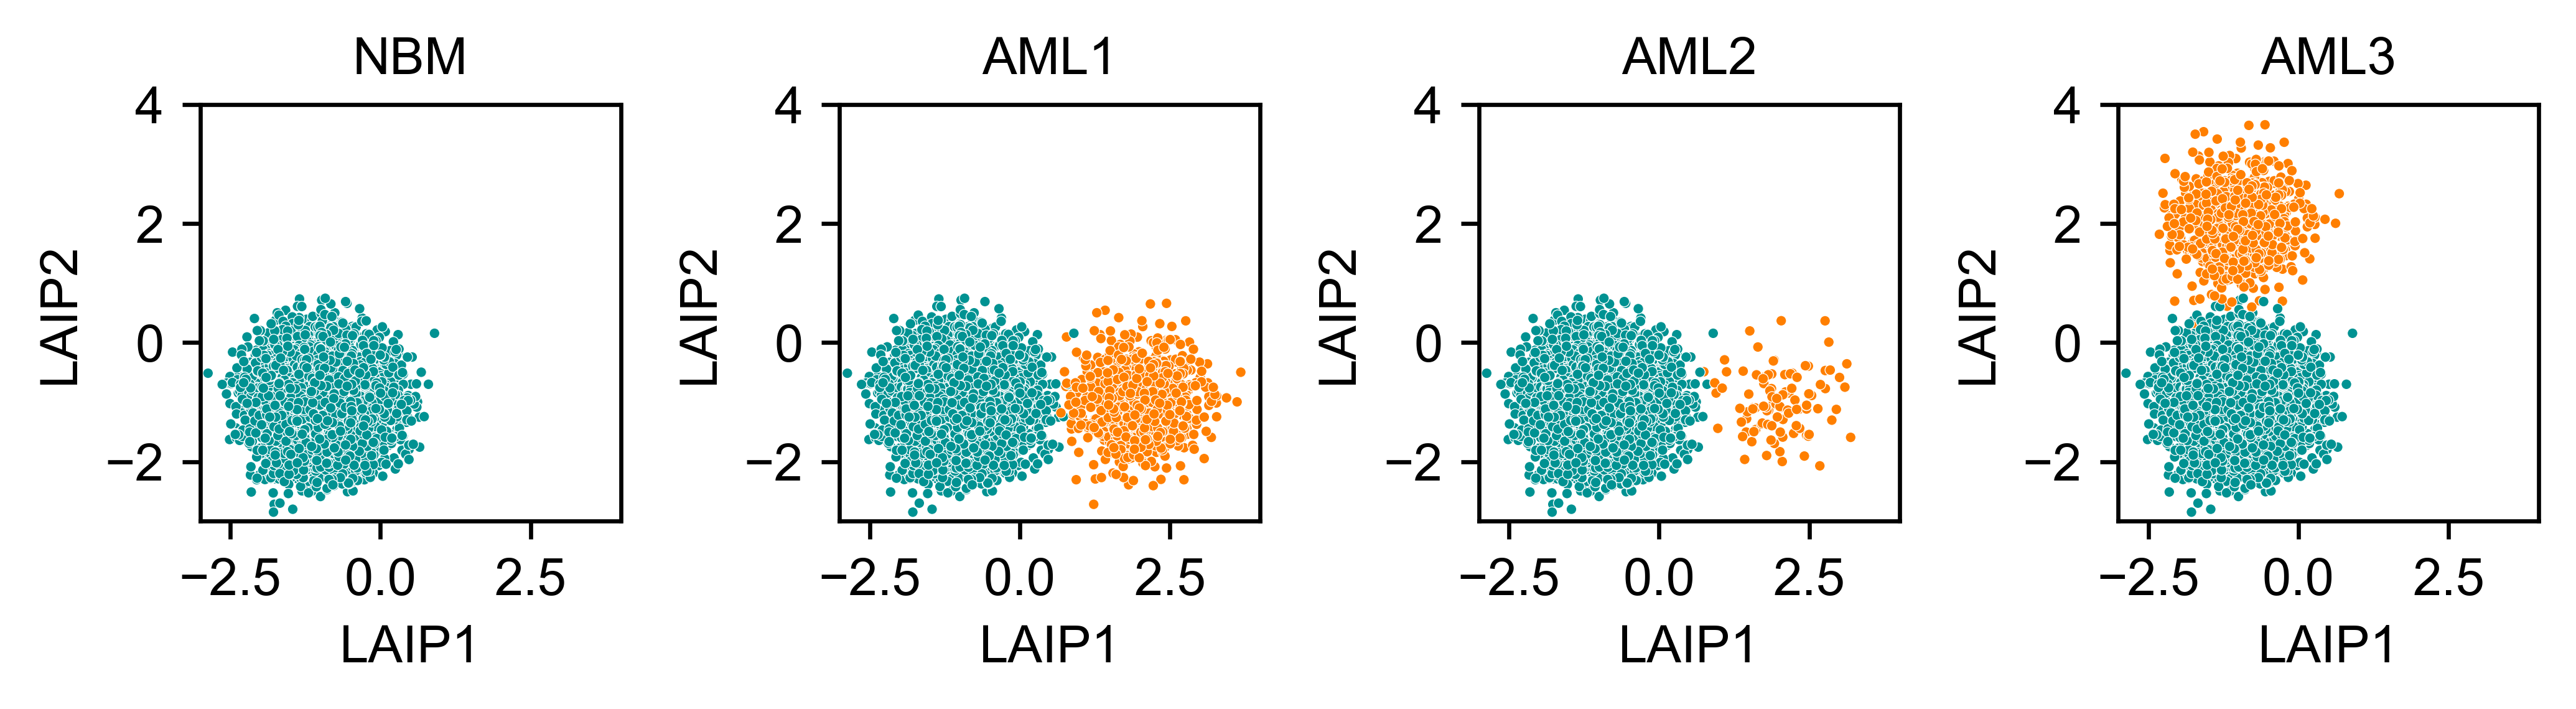

In [39]:
fig = plot_simulation(**default_values)
plt.savefig("Figure 2A.pdf")

/home/timmocking/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/timmocking/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/timmocking/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


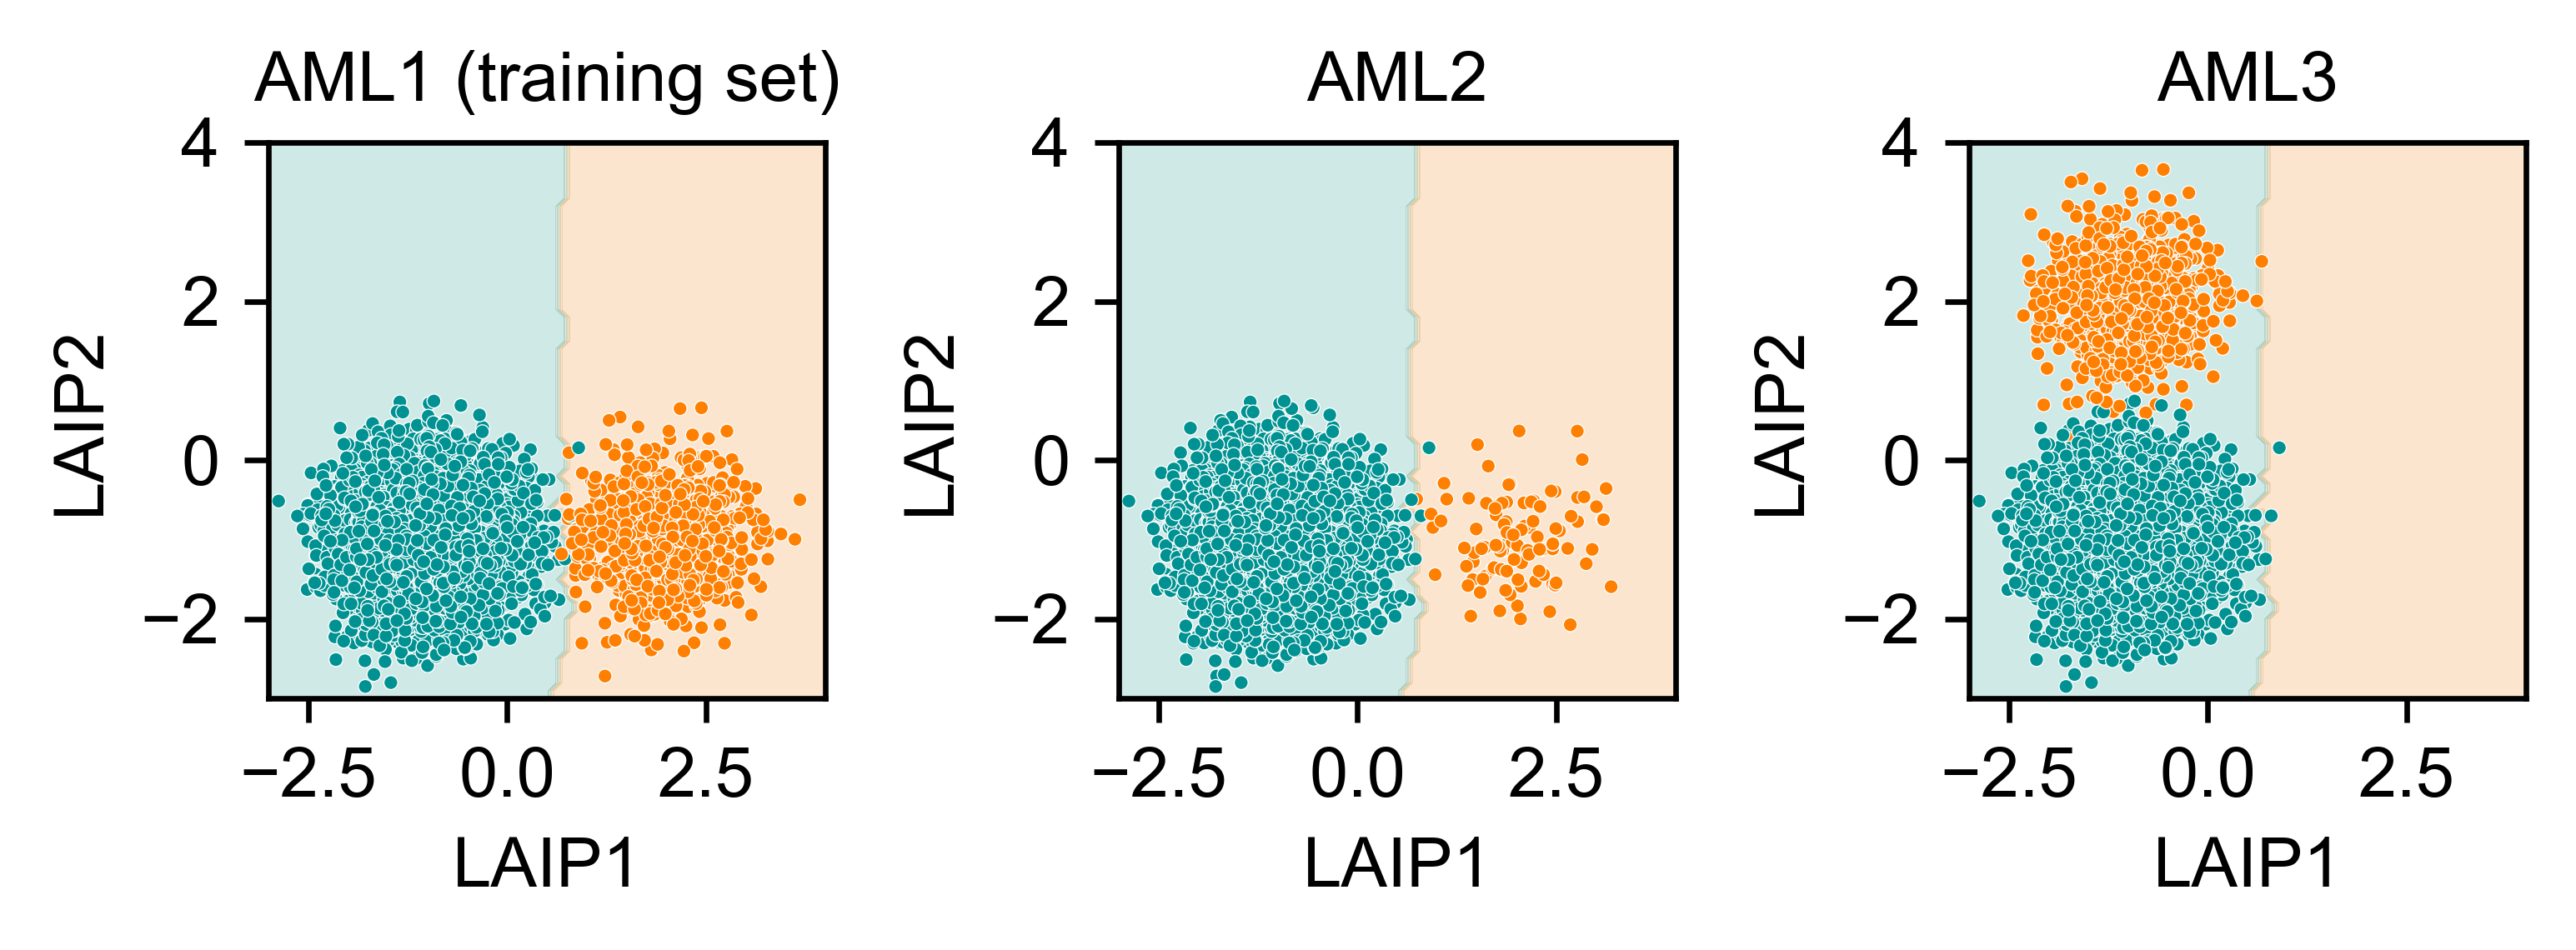

In [32]:
fig = plot_supervised(**default_values)
plt.savefig("Figure 2B.pdf")

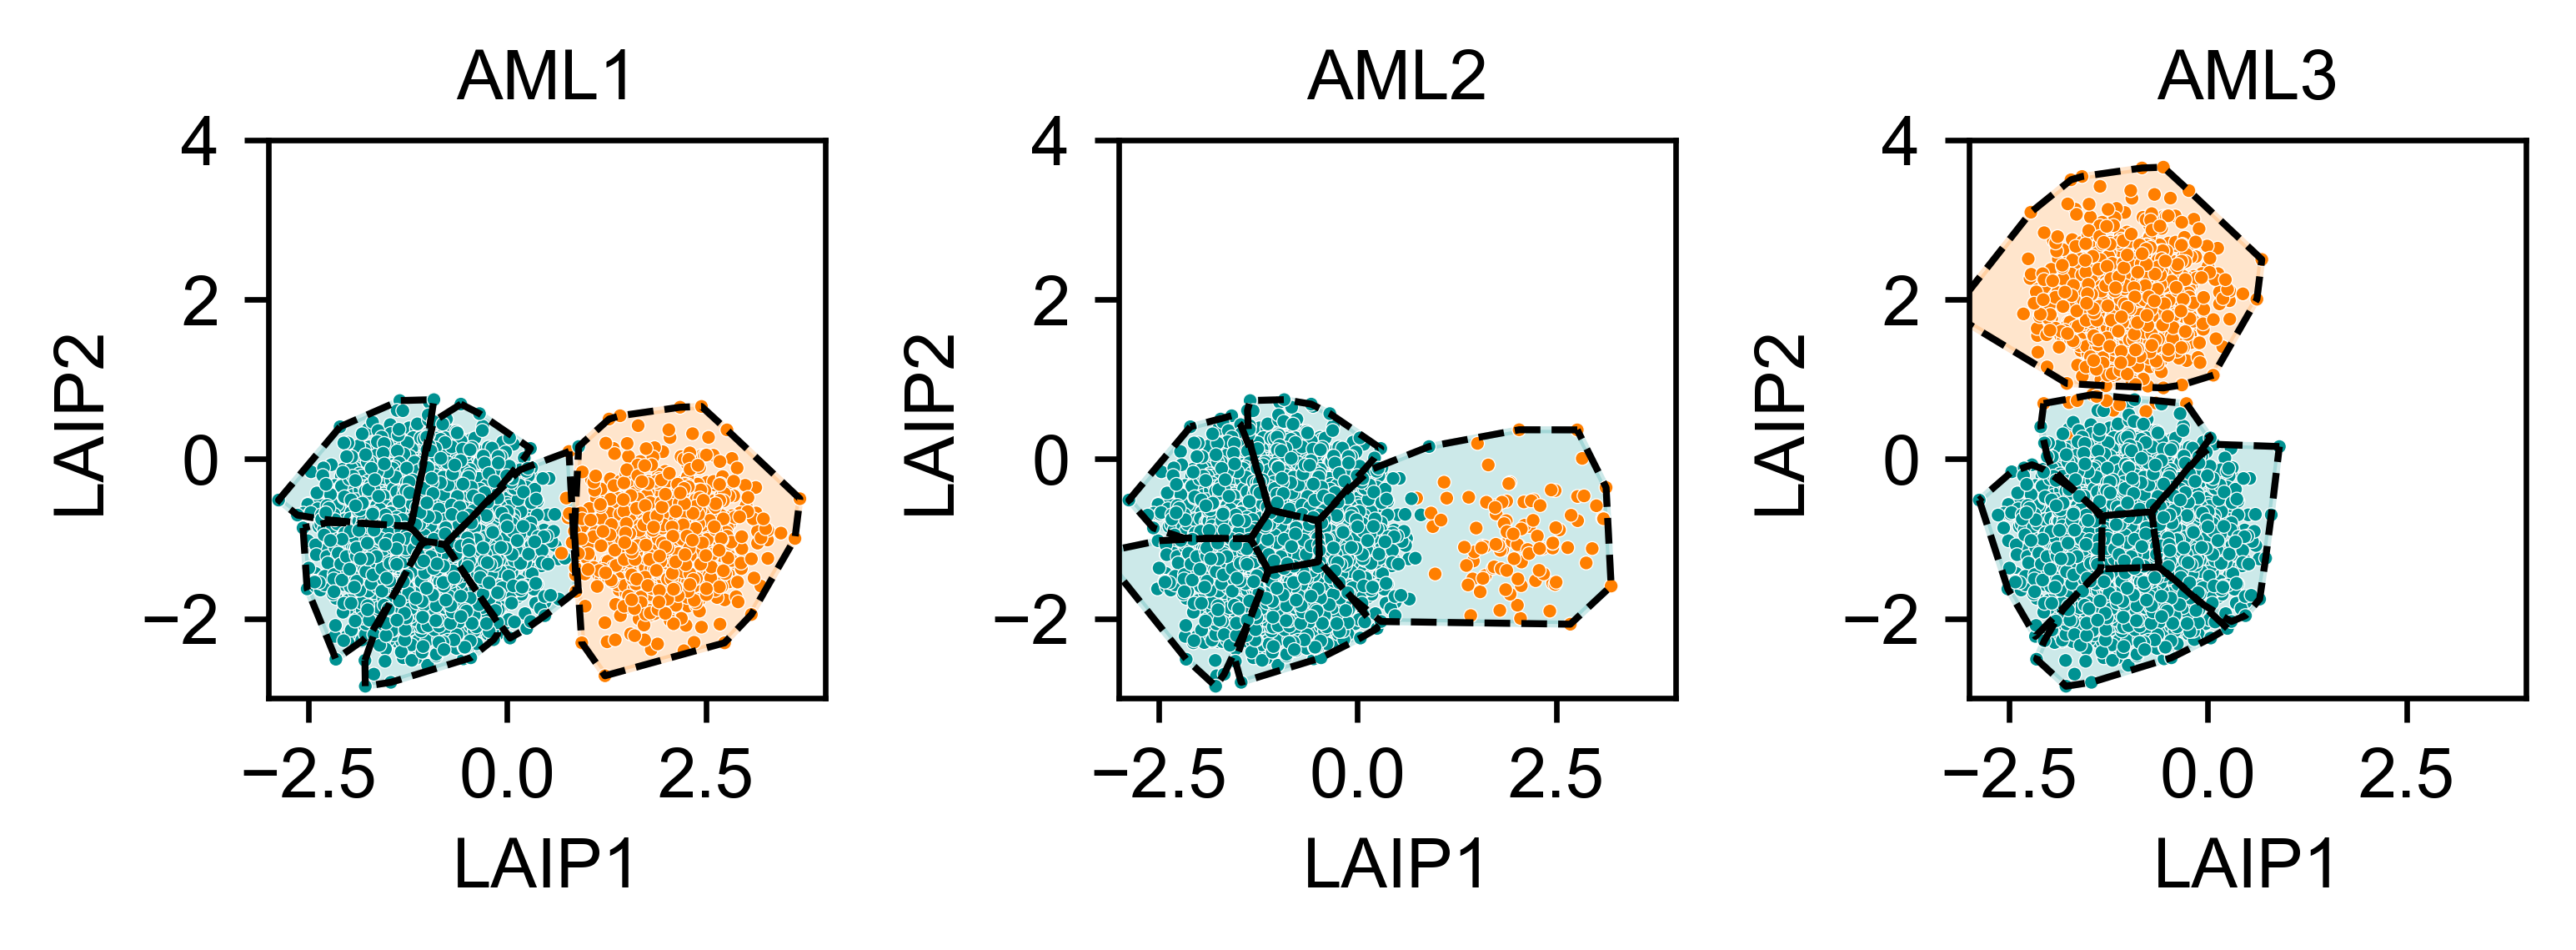

In [36]:
fig = plot_cluster_with_normal(**default_values)
plt.savefig("Figure 2C.pdf")

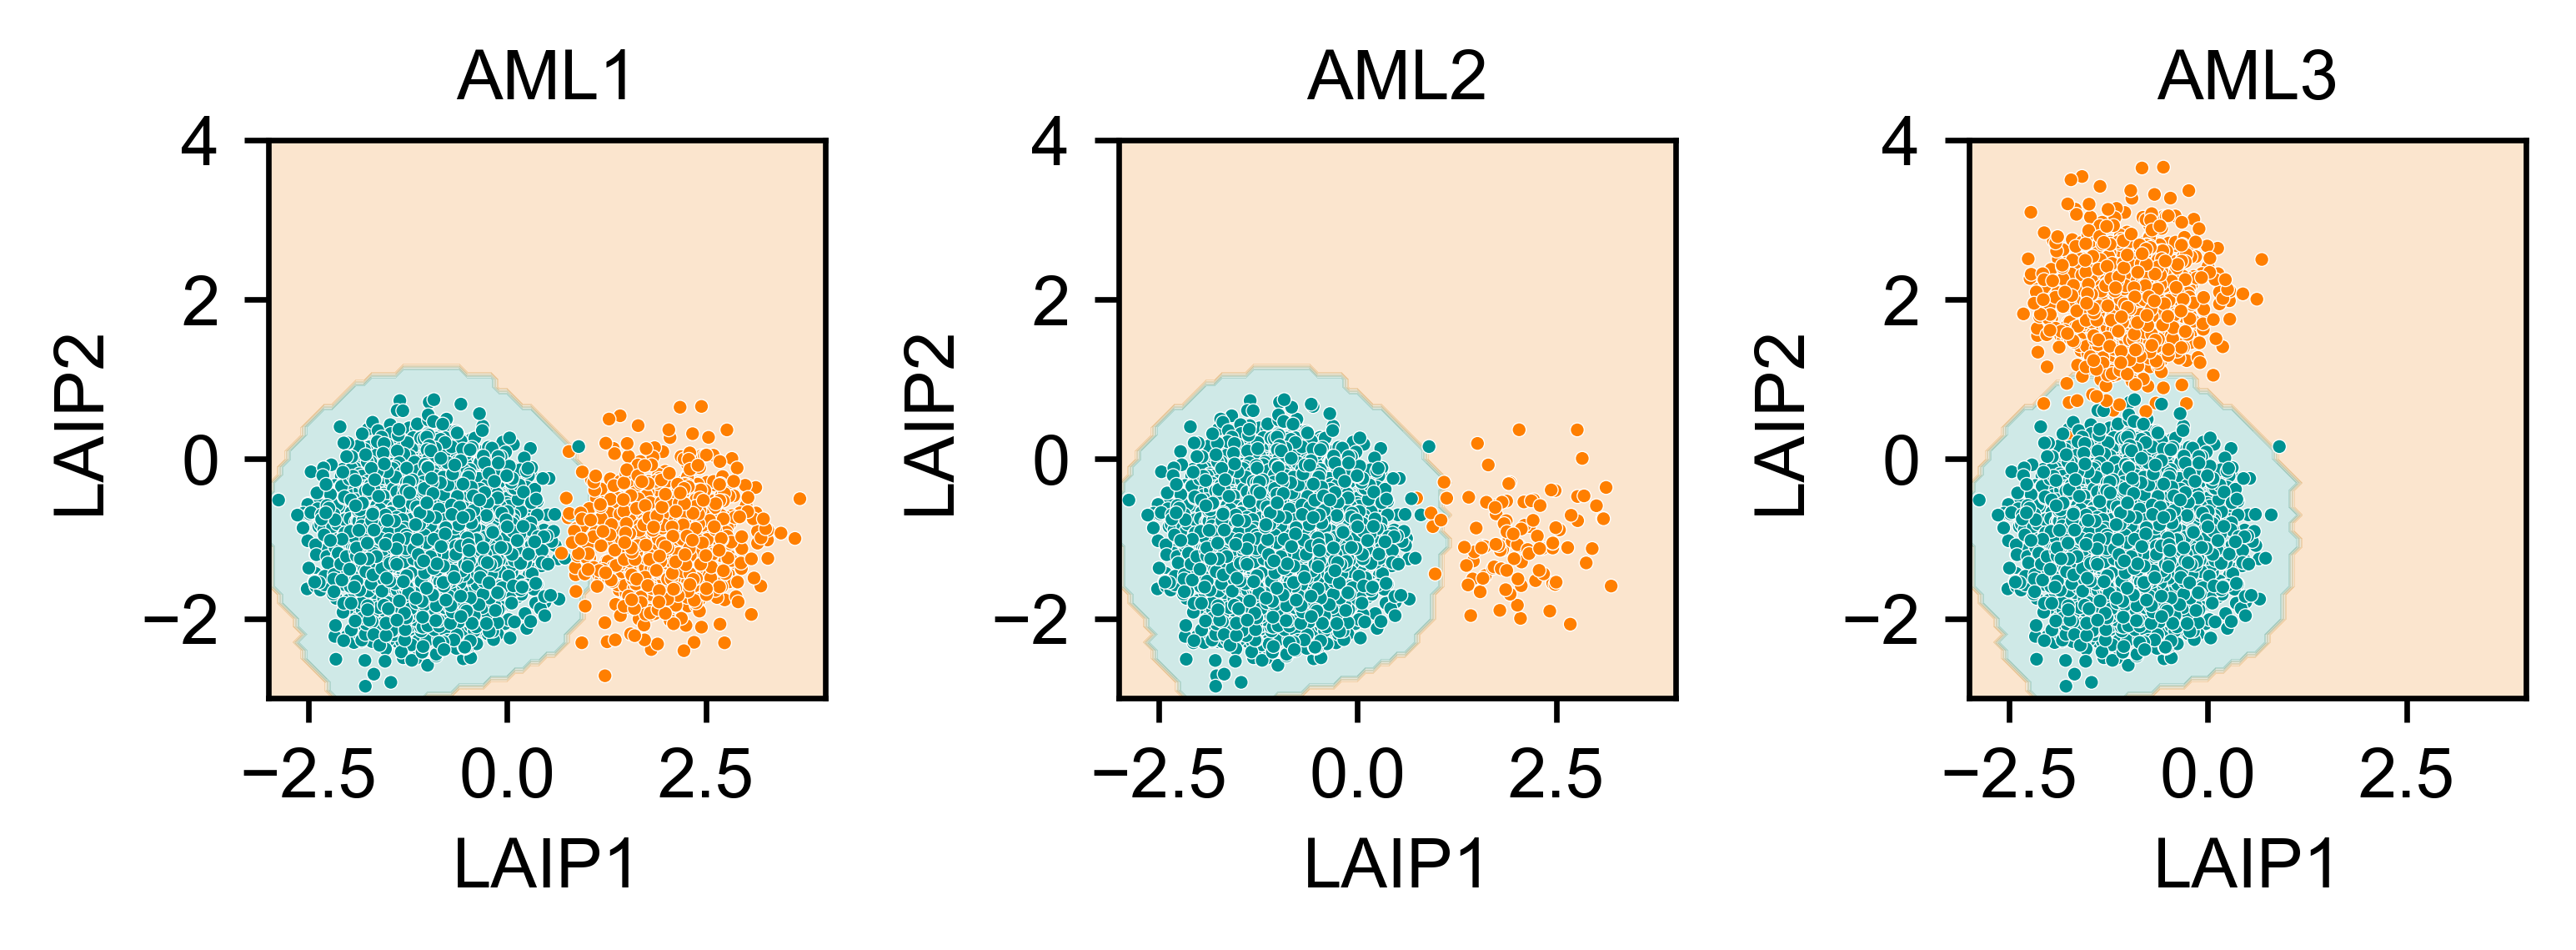

In [38]:
fig = plot_novelty_detection(**default_values)
plt.savefig("Figure 2D.pdf")

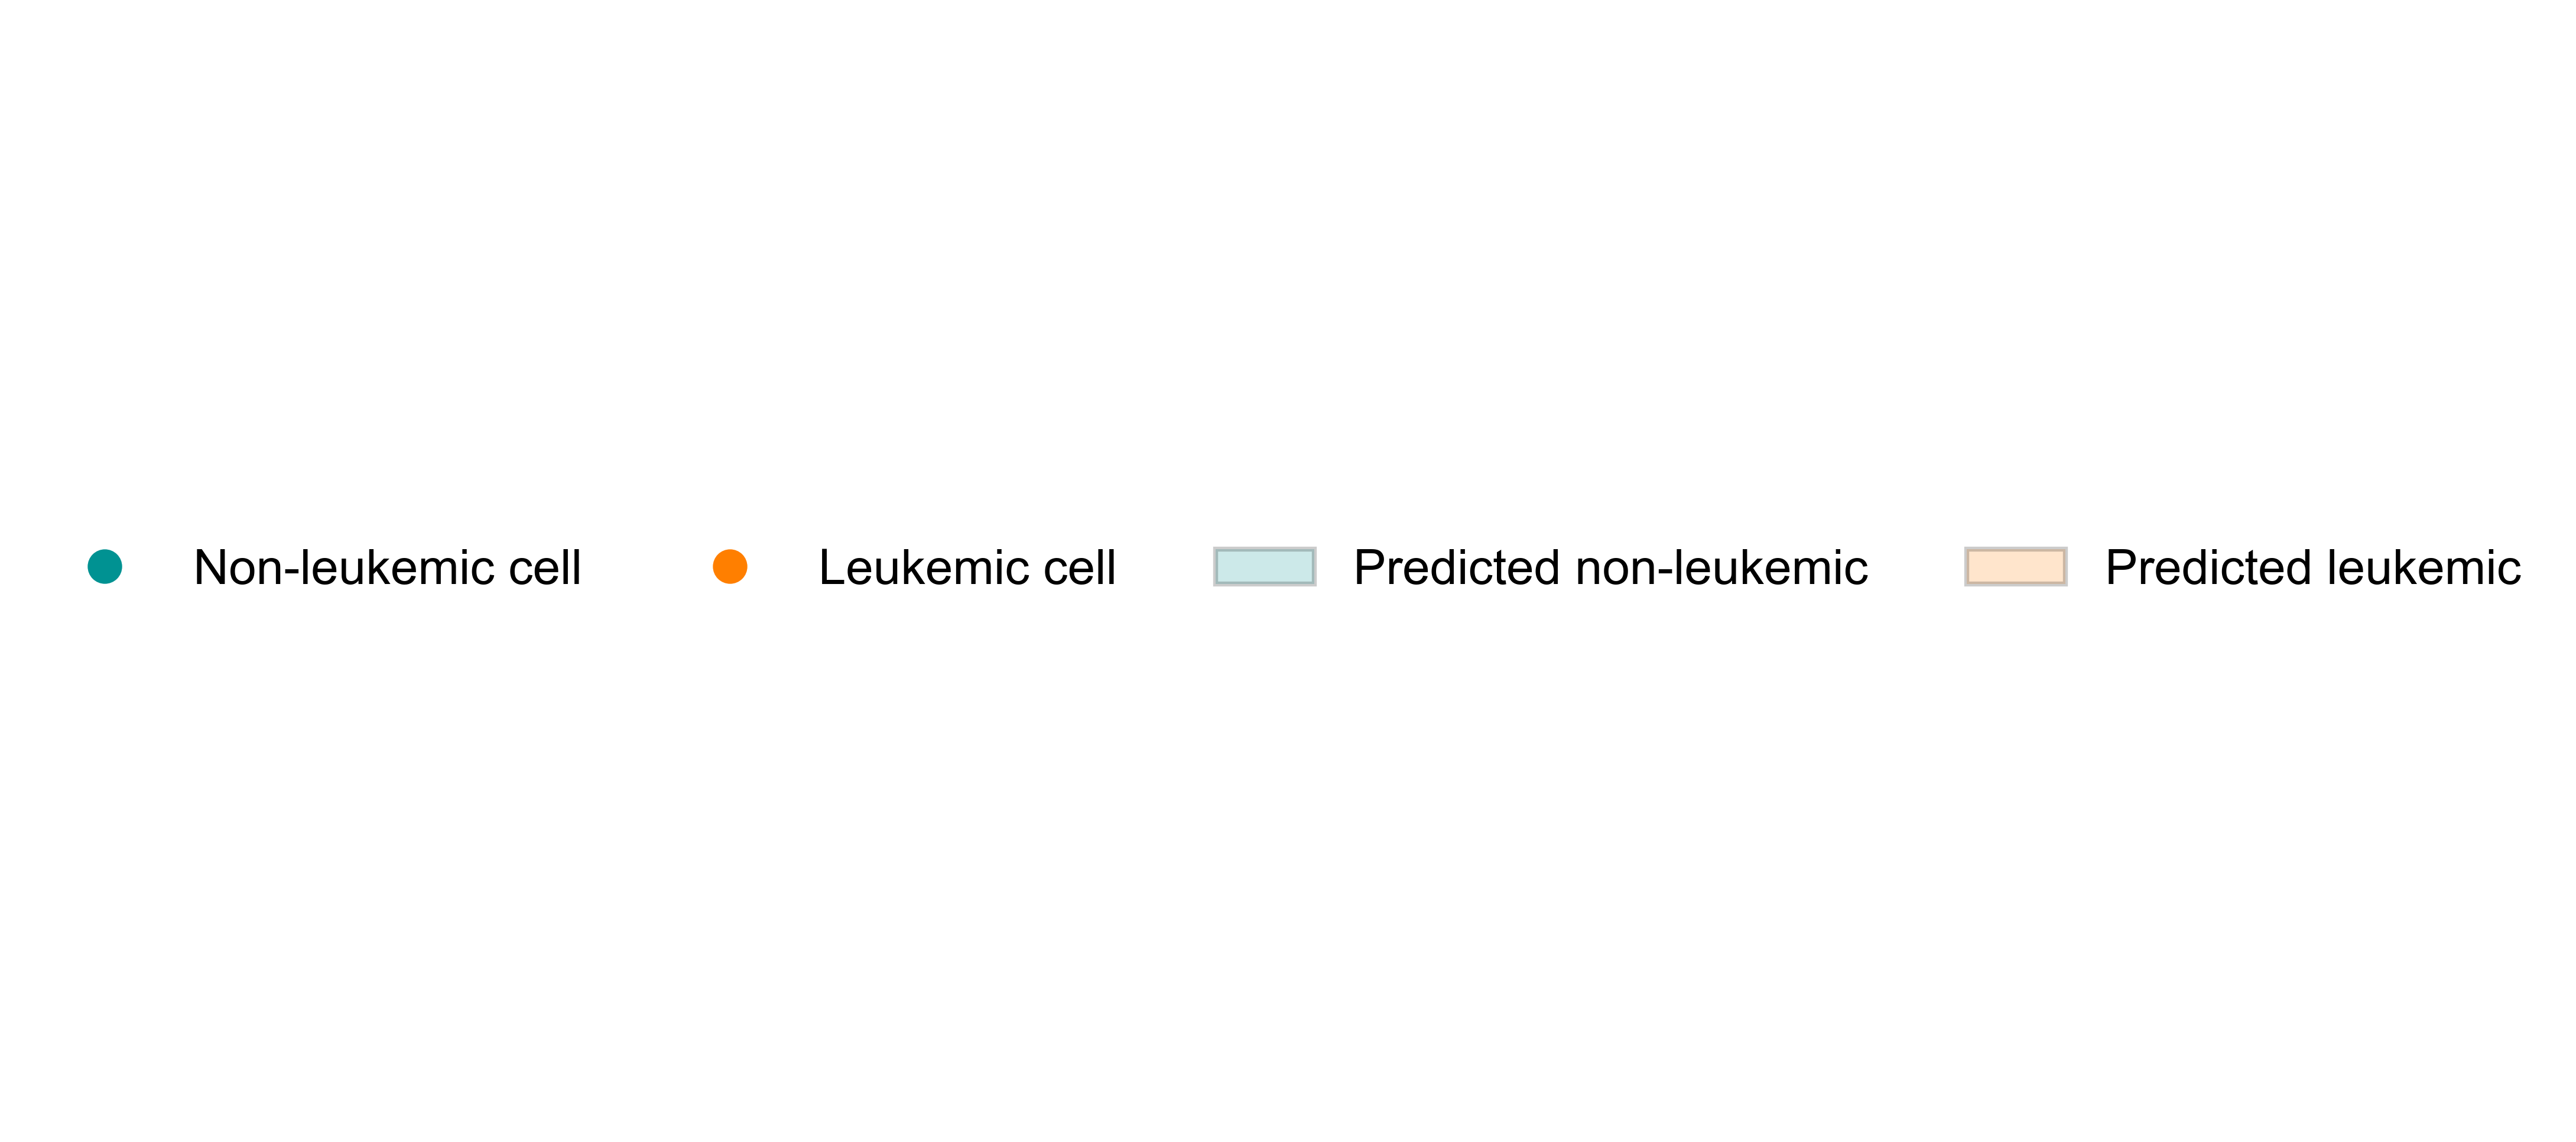

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch

# Create a figure and axis (we won't plot anything on it)
fig, ax = plt.subplots(figsize=(4, 4), dpi=600)

# Two different scatter representations (for legend)
scatter1 = plt.Line2D([0], [0], linestyle='none', marker='o', color="#009292ff", label='Non-leukemic cell')
scatter2 = plt.Line2D([0], [0], linestyle='none', marker='o', color="#ff7f00ff", label='Leukemic cell')

# Two background color patches (with small boxes around them)
rect1 = FancyBboxPatch((0, 0), width=1, height=1, boxstyle="round,pad=0.3", facecolor='#009292ff', 
                       alpha=0.2,
                       label='Predicted non-leukemic')
rect2 = FancyBboxPatch((0, 0), width=1, height=1, boxstyle="round,pad=0.3", facecolor='#ff7f00ff', 
                       alpha=0.2,
                       label='Predicted leukemic')

# Create the custom legend with horizontal orientation and boxes around background color
legend = ax.legend(handles=[scatter1, scatter2, rect1, rect2], 
                   loc='center', ncol=5, frameon=False)

# Hide the axes to only show the legend
ax.set_axis_off()

# Display the plot (which contains only the legend)
plt.savefig("legend.pdf")